In [1]:
from DataGen import Mitchell_Schaeffer
import numpy as np
import sys

sys.path.append('..')
from utilities import utils
from solver.thetamethod import ThetaMethod

In [2]:
T = 500.0
dt = 0.1
u0 = np.array([0,0])

eqtype = 'ODE'

'''
u' = k*u*(u-a)(1-u)-v+I_app
v' = eps*(u-gammma*v)
'''

k = 8.0
alpha = 0.15
gamma = 0.1
eps = 0.01
I = 0.125
x0 = (1,2)

2
2


IndexError: index 3 is out of bounds for axis 1 with size 3

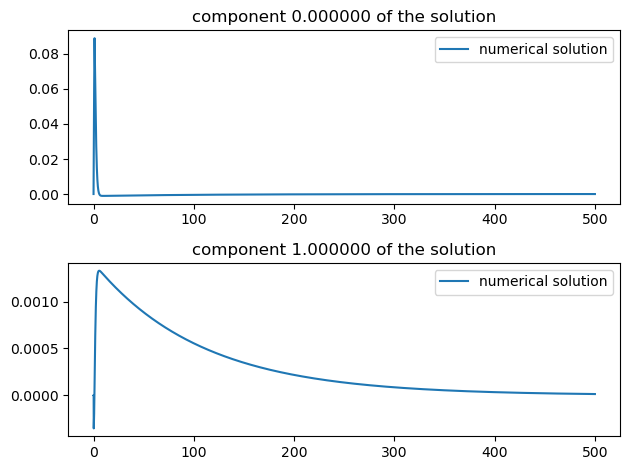

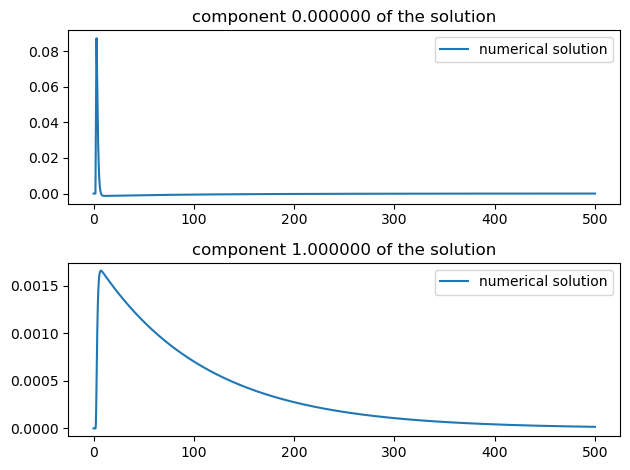

In [3]:
model = Mitchell_Schaeffer(N_sample=1,grid_size=3,solver=ThetaMethod(T=T, dt=dt, u0=u0, eqtype=eqtype),x0=x0, k=k, alpha=alpha, eps=eps, I=I, gamma=gamma)

model.GenerateSample()